In [9]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#scaling
from sklearn.preprocessing import StandardScaler

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# For displaying plots inline
%matplotlib inline

In [10]:
# Replace 'house_data.csv' with the path to your dataset
data_path = 'house_data.csv'
df = pd.read_csv(data_path)

# Display the first few rows to ensure the dataset has loaded correctly
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
# Basic information about the dataset
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# Handle missing data
# 1. Interpolation for the 'price' column
df['price'] = df['price'].interpolate(method='linear')

# 2. Replace missing values in 'sqt_ft' with the mean
df['sqft_living'].fillna(df['sqft_living'].mean(), inplace=True)

print("\nDataFrame After Handling Missing Values:")
print(df)


DataFrame After Handling Missing Values:
               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...

C:\Users\muhamet.hajdini\AppData\Local\Temp\ipykernel_8128\973252753.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sqft_living'].fillna(df['sqft_living'].mean(), inplace=True)


In [13]:
#Here we started to preprocess the data specifically the zipcodes --> location we are doing
#this because we want to gain a better understanding for each one of locations and it's easier on the eye
#

In [14]:
# Check unique values in the column
unique_values = df['zipcode'].unique()
print("Distinct values:", unique_values)


Distinct values: [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


In [16]:
zip_to_name = {
    98178: 'Seattle', 98125: 'Seattle', 98028: 'Kenmore', 98136: 'Seattle',
    98074: 'Redmond', 98053: 'Redmond', 98003: 'Federal Way', 98198: 'Seattle',
    98146: 'Seattle', 98038: 'Maple Valley', 98007: 'Bellevue', 98115: 'Seattle',
    98107: 'Seattle', 98126: 'Seattle', 98019: 'Woodinville', 98103: 'Seattle',
    98002: 'Auburn', 98133: 'Seattle', 98040: 'Mercer Island', 98092: 'Auburn',
    98030: 'Kent', 98119: 'Seattle', 98112: 'Seattle', 98052: 'Redmond',
    98027: 'Issaquah', 98117: 'Seattle', 98058: 'Renton', 98001: 'Auburn',
    98056: 'Renton', 98166: 'Seattle', 98023: 'Tacoma', 98070: 'Vashon',
    98148: 'Seattle', 98105: 'Seattle', 98042: 'Covington', 98008: 'Bellevue',
    98059: 'Issaquah', 98122: 'Seattle', 98144: 'Seattle', 98004: 'Bellevue',
    98005: 'Bellevue', 98034: 'Kirkland', 98075: 'Sammamish', 98116: 'Seattle',
    98010: 'Black Diamond', 98118: 'Seattle', 98199: 'Seattle', 98032: 'Federal Way',
    98045: 'North Bend', 98102: 'Seattle', 98077: 'Woodinville', 98108: 'Seattle',
    98168: 'Seattle', 98177: 'Seattle', 98065: 'Snoqualmie', 98029: 'Sammamish',
    98006: 'Bellevue', 98109: 'Seattle', 98022: 'Buckley', 98033: 'Kirkland',
    98155: 'Shoreline', 98024: 'Black Diamond', 98011: 'Bothell', 98031: 'Kent',
    98106: 'Seattle', 98072: 'Redmond', 98188: 'Bellevue', 98014: 'Carnation',
    98055: 'Renton', 98039: 'Medina'
}

# Map zip codes to locations
df['location'] = df['zipcode'].map(zip_to_name)

# Display the DataFrame with mapped locations
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
0             1180      5650     1.0           0     0  ...        1180   
1             2570   

In [15]:
unique_values = df['location'].unique()
print("Distinct values:", unique_values)

KeyError: 'location'

In [16]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
#In this section we are going to work in feature engineering 

In [17]:
df['price_per_sqft'] = df['price'] / df['sqft_living']


scaler = StandardScaler()
df[['price', 'sqft_living', 'sqft_lot']] = scaler.fit_transform(df[['price', 'sqft_living', 'sqft_lot']])

df['price_bins'] = pd.cut(df['price'], bins=5, labels=['Low', 'Medium', 'High', 'Very High'])


ValueError: Bin labels must be one fewer than the number of bin edges

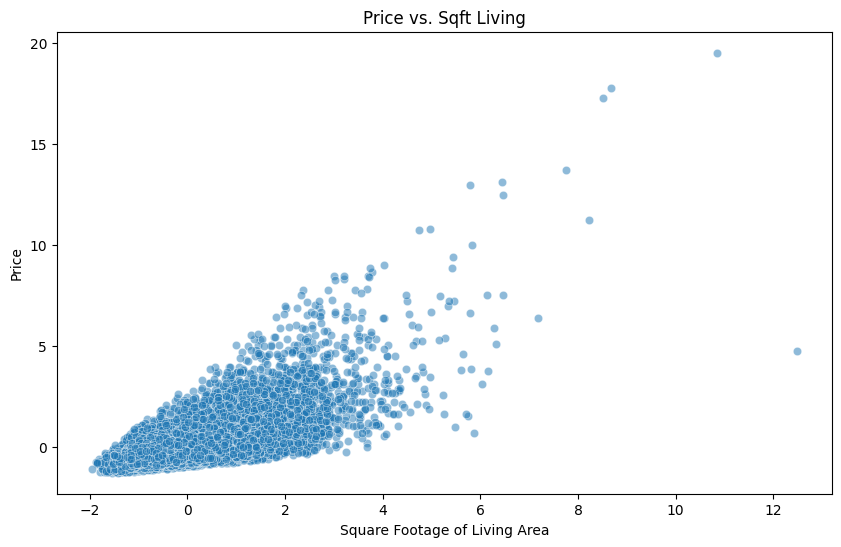

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sqft_living'], y=df['price'], alpha=0.5)
plt.title('Price vs. Sqft Living')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()


In [19]:
data_path = 'house_data.csv'	
df = pd.read_csv(data_path)

In [20]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429


In [22]:
df['age'] = 2024 - df['yr_built']

In [23]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,69
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,73
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,91
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,59
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,37


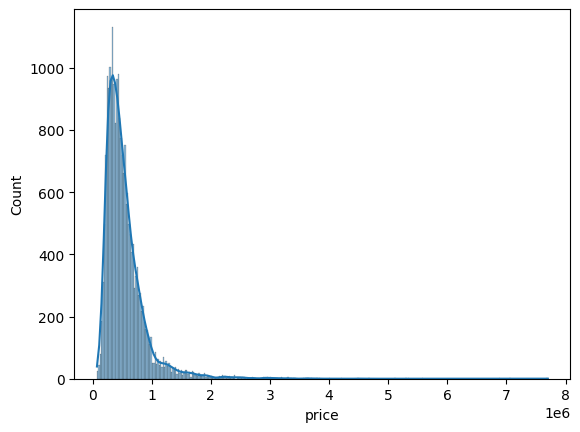

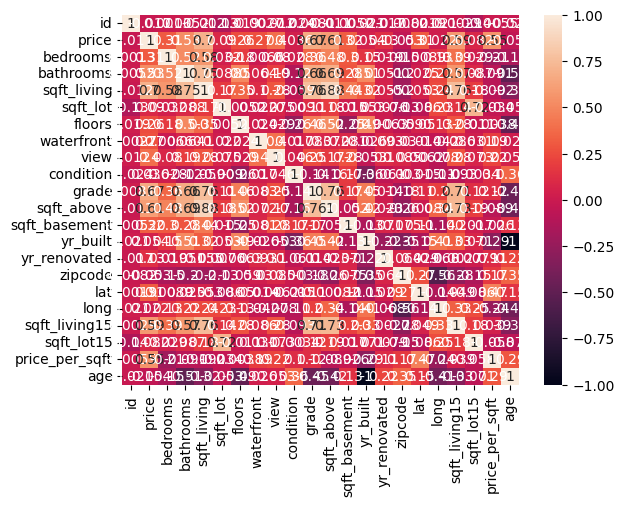

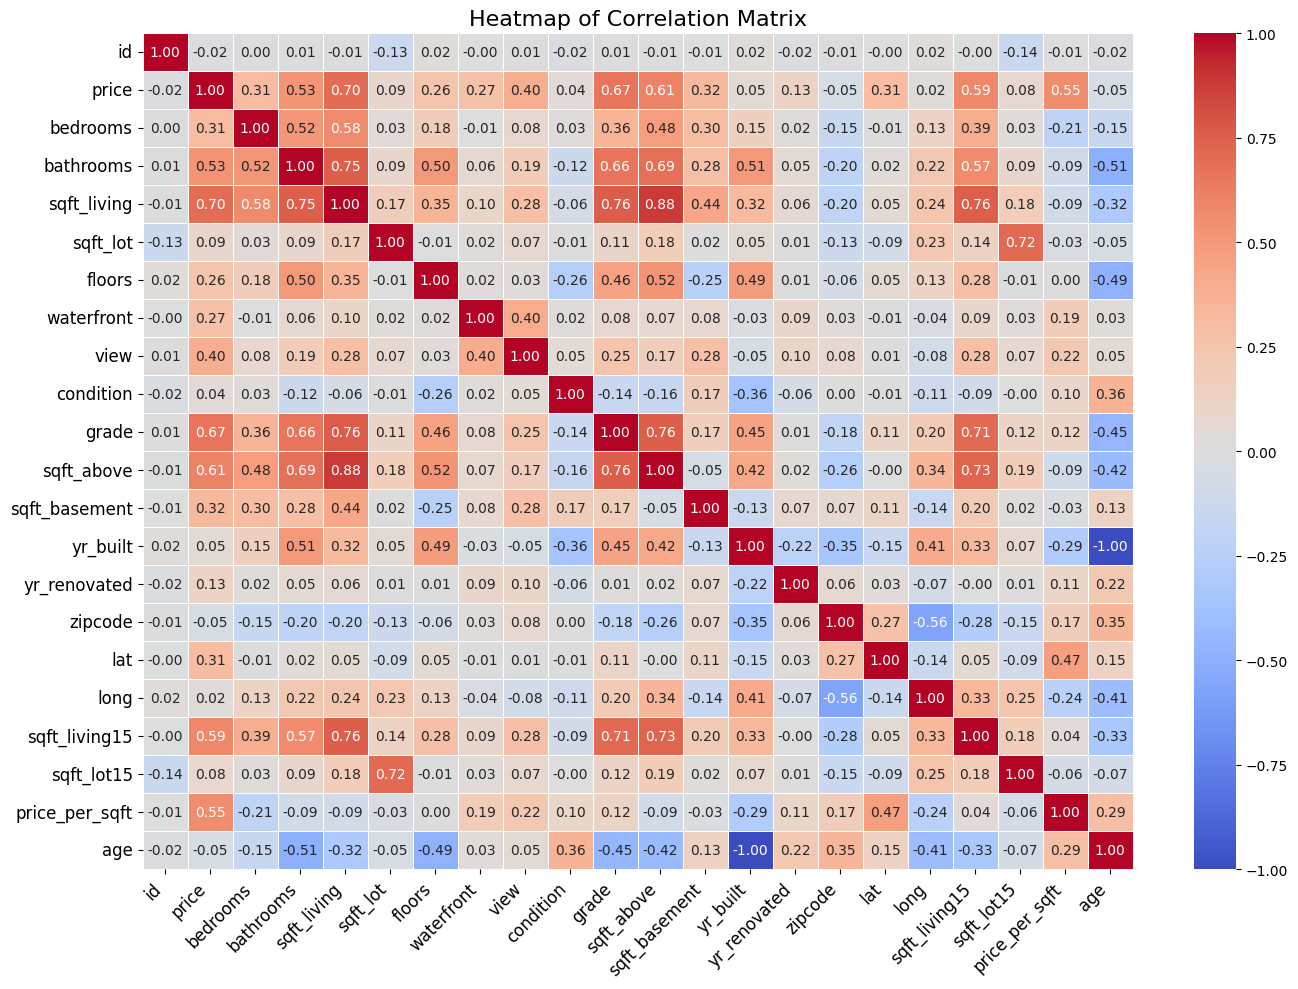

In [31]:
#Correlation Vizualtion

sns.histplot(df['price'], kde=True)
plt.show()


# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True)

# Plot heatmap with enhancements
plt.figure(figsize=(14, 10))  # Increase figure size
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Heatmap of Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [27]:
#features definining

In [28]:
features = [col for col in df.columns if col not in ['id', 'date', 'price']]
X = df[features]
y = df['price']

In [32]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [35]:
# Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"  MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"  MSE: {mean_squared_error(y_true, y_pred):.2f}")
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2_score(y_true, y_pred):.2f}")
    print("-" * 30)

evaluate_model("Random Forest", y_test, rf_preds)

Random Forest Performance:
  MAE: 6030.78
  MSE: 884688655.13
  RMSE: 29743.72
  R2 Score: 0.99
------------------------------


In [36]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

In [37]:
evaluate_model("Linear Regression", y_test, lr_preds)

Linear Regression Performance:
  MAE: 71081.73
  MSE: 17518200994.05
  RMSE: 132356.34
  R2 Score: 0.88
------------------------------


In [38]:
# Neural Network
nn = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
nn.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
nn_preds = nn.predict(X_test_scaled).flatten()

C:\Users\muhamet.hajdini\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [39]:
evaluate_model("Neural Network", y_test, nn_preds)

Neural Network Performance:
  MAE: 58215.65
  MSE: 10804736716.17
  RMSE: 103945.84
  R2 Score: 0.93
------------------------------


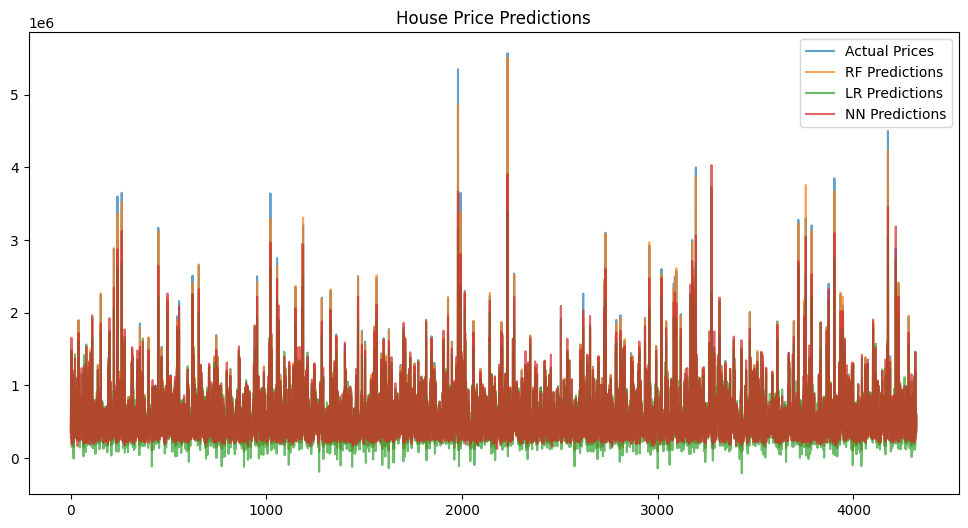

In [40]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Prices", alpha=0.7)
plt.plot(rf_preds, label="RF Predictions", alpha=0.7)
plt.plot(lr_preds, label="LR Predictions", alpha=0.7)
plt.plot(nn_preds, label="NN Predictions", alpha=0.7)
plt.legend()
plt.title("House Price Predictions")
plt.show()